In [1]:
import os 
import sys 
sys.path.append('../lznestpy')

import nestpy
from random import choices
from nestUtils import *

import matplotlib.pyplot as plt
import numpy as np

from LXeSimulation import *

LZSR1g1 = 0.114
LZSR1g2 = 47.1
LZexposure = 15.3

In [2]:
def simulate_LXe_NEST(EventRateFile, nEvents, g1, g2):
    trueEventRate = np.loadtxt(EventRateFile, skiprows=0,delimiter=',')
    if trueEventRate.shape[0] >= 1500:
        trueEventRate = trueEventRate[:1000,:]
    reco_energies, S1s, spikes, S2s, weights = simulate_LXe(EventRateFile, nEvents, g1, g2)
    cutMask = (S1s >= 3) & (S1s <= 80) & (spikes >= 3)
    return reco_energies[cutMask], weights[cutMask], S1s[cutMask], S2s[cutMask]


def signal_significance(signalRate, bkgRate, exposure):
    return signalRate * exposure / np.sqrt(bkgRate*exposure)


def findXenonSingalRate(eventRateFile, g1, g2):
    eventRate = np.loadtxt(eventRateFile, skiprows=0,delimiter=',')
    energy, weight, S1, S2 = simulate_LXe_NEST(eventRateFile, 1000000, g1, g2)
    hist, edges = np.histogram(energy, bins=np.arange(0, 100), weights=0.9*weight)
    total_rate = np.sum(hist)
    return total_rate, hist, edges


def findXenonModelSignificance(eventRateFile, bkgFile, g1=0.114, g2=47.1, exposure=15.3):
    total_rate, hist, edges = findXenonSingalRate(eventRateFile, g1, g2)
    bkgRates = np.loadtxt(bkgFile, skiprows=0,delimiter=',')
    bkgRate = np.trapz(bkgRates[:,1], bkgRates[:,0])/0.9
    return signal_significance(total_rate, bkgRate*0.005, exposure)


In [3]:
def parse_xenon_filename_auto(filename):
    """
    Parse Argon filename to extract model parameters
    Format example: mpi7_PS-PS_mchi10_gchi0.6_cHiggs0_EventRate
    
    Returns:
        mphi: Mediator mass in GeV (float)
        is_ps_ps: Whether interaction type is PS-PS (bool)
        mchi: DM mass in GeV (float) 
        gchi: DM coupling (float)
        c_higgs: Higgs coupling (float)
    """
    import re
    
    
    # Extract mphi
    mphi = float(re.search(r'mpi(\d+(?:\.\d+)?)', filename).group(1))
    
    # Check if PS-PS exists
    is_ps_ps = 'PS-PS' in filename
    
    # Extract mchi
    mchi = float(re.search(r'mchi(\d+(?:\.\d+)?)', filename).group(1))

    # Extract gchi
    gchi = float(re.search(r'gchi(\d+(?:\.\d+)?)', filename).group(1))

    # Extract gSM
    gSM = float(re.search(r'gSM(\d+(?:\.\d+)?)', filename).group(1))
    
    # Extract cHiggs
    c_higgs = float(re.search(r'cHiggs(\d+(?:\.\d+)?)', filename).group(1))
    
    return mphi, is_ps_ps, mchi, gchi, gSM,c_higgs
    

print(parse_xenon_filename_auto("mpi7_S-PS_mchi5_gchi0.1_gSM0.6_cHiggs0.01_EventRate.csv"))

(7.0, False, 5.0, 0.1, 0.6, 0.01)


In [5]:
# XenonEventRateFolder = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap"
XenonEventRateFolder = "/Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap_zoom"
XenonEventRateFiles = sorted(os.listdir(XenonEventRateFolder))

mphi_table = []
is_ps_ps_table = []
mchi_table = []
gchi_table = []
gSM_table = []
c_higgs_table = []
significance_table = []

for XenonEventRateFile in XenonEventRateFiles:
    mphi, is_ps_ps, mchi, gchi, gSM, c_higgs = parse_xenon_filename_auto(XenonEventRateFile)
    print("Now processing", f"{XenonEventRateFolder}/{XenonEventRateFile}")
    significance = findXenonModelSignificance(os.path.join(XenonEventRateFolder, XenonEventRateFile), 
                                              f"/Users/yxu/workbenches/XeArLoopworkbench/LZSR1_bkg_total.txt", 
                                              LZSR1g1, LZSR1g2, LZexposure)
    mphi_table.append(mphi)
    is_ps_ps_table.append(is_ps_ps)
    mchi_table.append(mchi)
    gchi_table.append(gchi)
    gSM_table.append(gSM)
    c_higgs_table.append(c_higgs)
    significance_table.append(significance)

Now processing /Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.1_gSM0.6_cHiggs0.01_EventRate.csv
Now processing /Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.2_gSM0.6_cHiggs0.01_EventRate.csv
Now processing /Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.3_gSM0.6_cHiggs0.01_EventRate.csv
Now processing /Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.4_gSM0.6_cHiggs0.01_EventRate.csv
Now processing /Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.5_gSM0.6_cHiggs0.01_EventRate.csv
Now processing /Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap_zoom/mpi7_S-PS_mchi10_gchi1.6_gSM0.6_cHiggs0.01_EventRate.csv
Now processing /Users/yxu/workbenches/XeArLoopworkbench/EventRatesMMA/Xenon_auto_heatmap_zoom/

In [6]:
mphi_array = np.array(mphi_table)
is_ps_ps_array = np.array(is_ps_ps_table)
mchi_array = np.array(mchi_table)
gchi_array = np.array(gchi_table)
gSM_array = np.array(gSM_table)
c_higgs_array = np.array(c_higgs_table)
significance_array = np.array(significance_table)

print(mphi_array.shape)
print(is_ps_ps_array.shape)
print(mchi_array.shape)
print(gchi_array.shape)
print(gSM_array.shape)
print(c_higgs_array.shape)
print(significance_array.shape)

print(mphi_array[:10])
print(is_ps_ps_array[:10])
print(mchi_array[:100])
print(gchi_array[:10])
print(gSM_array[:10])
print(c_higgs_array[:10])
print(significance_array[:10])


(567,)
(567,)
(567,)
(567,)
(567,)
(567,)
(567,)
[7. 7. 7. 7. 7. 7. 7. 7. 7. 7.]
[False False False False False False False False False False]
[10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10. 10.
 10. 10. 10. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 13. 13. 13. 13.
 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 13. 14. 14. 14. 14. 14. 14.
 14. 14. 14. 14. 14. 14. 14. 14. 14. 14.]
[1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 1. ]
[0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[0.80844339 1.13480784 1.55765066 2.08243906 2.72988664 3.53242898
 4.47796517 5.62177083 6.95615853 0.55458879]


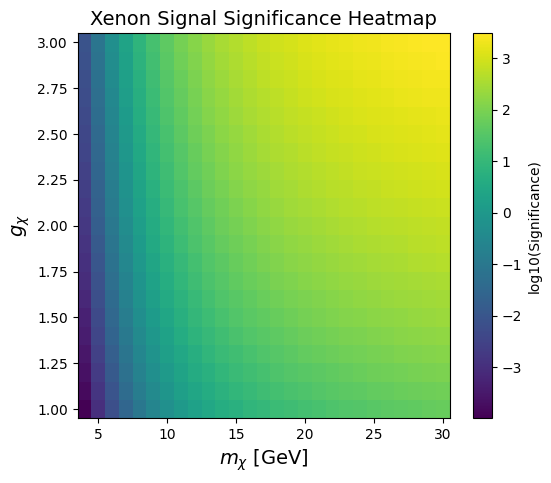

In [10]:
plt.figure(figsize=(6, 5))

# Create unique values for mchi and gchi to form grid
unique_mchi = np.unique(mchi_array)
unique_gchi = np.unique(gchi_array)

# Create a 2D grid for the heatmap
grid = np.zeros((len(unique_gchi), len(unique_mchi)))

# Fill the grid with log10(significance) values
for i, gchi_val in enumerate(unique_gchi):
    for j, mchi_val in enumerate(unique_mchi):
        mask = (mchi_array == mchi_val) & (gchi_array == gchi_val)
        if np.any(mask):
            grid[i,j] = np.log10(significance_array[mask][0])

# Create heatmap
plt.pcolormesh(unique_mchi, unique_gchi, grid, shading='auto', cmap='viridis')
plt.colorbar(label='log10(Significance)')

plt.xlabel(r'$m_\chi$ [GeV]',fontsize=14)
plt.ylabel(r'$g_\chi$',fontsize=14)
plt.title('Xenon Signal Significance Heatmap',fontsize=14)

# plt.yscale('log')
# plt.xscale('log')
plt.savefig("Xenon_Signal_Significance_Heatmap_zoomedIn.pdf",dpi=150)

plt.show()




In [9]:
# Save the heatmap data to a CSV file
import pandas as pd

# Create DataFrame with mchi values as index and gchi values as columns
df = pd.DataFrame(grid, index=unique_gchi, columns=unique_mchi)

# Save to CSV with header and index
df.to_csv('Xenon_Signal_Significance_Heatmap_zoomedIn.csv')
